## CIFAR-10

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
dataset_outdim = {'cifar10':10, 'cifar100':100,'imagenet':1000}
data_choice = 'cifar10'
cache_exp = torch.load(f'cache_exp_{data_choice}.pt')
cache_exp.keys()

dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

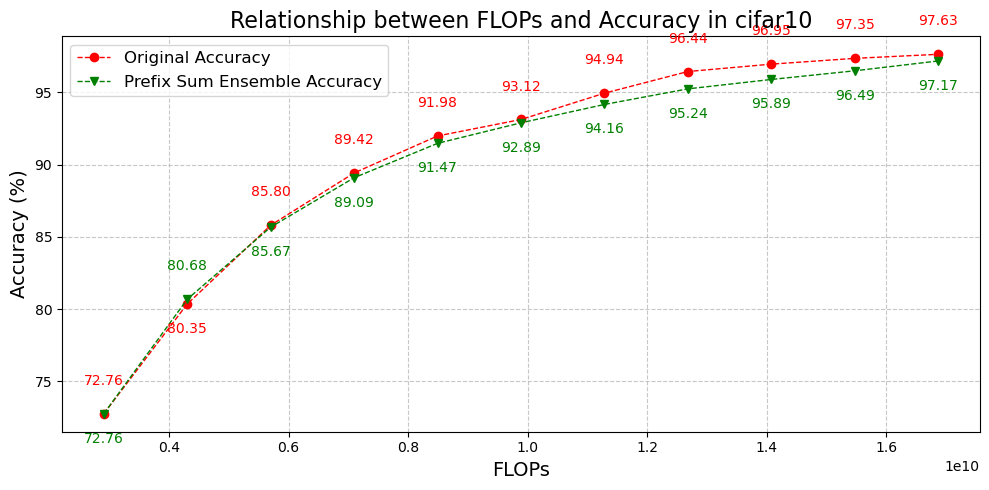

In [3]:
# Data: FLOPs and accuracy
flops_actual = [2908152576, 4304009472, 5699866368, 7095723264, 8491580160, 9887437056, 11283293952, 12679150848, 14075007744, 15470864640, 16866721536]
origin_acc = [72.76, 80.35, 85.8, 89.42, 91.98, 93.12, 94.94, 96.44, 96.95, 97.35, 97.63]
prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_actual, origin_acc, marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_actual, origin_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_actual, prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Prefix Sum Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_actual, prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {data_choice}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

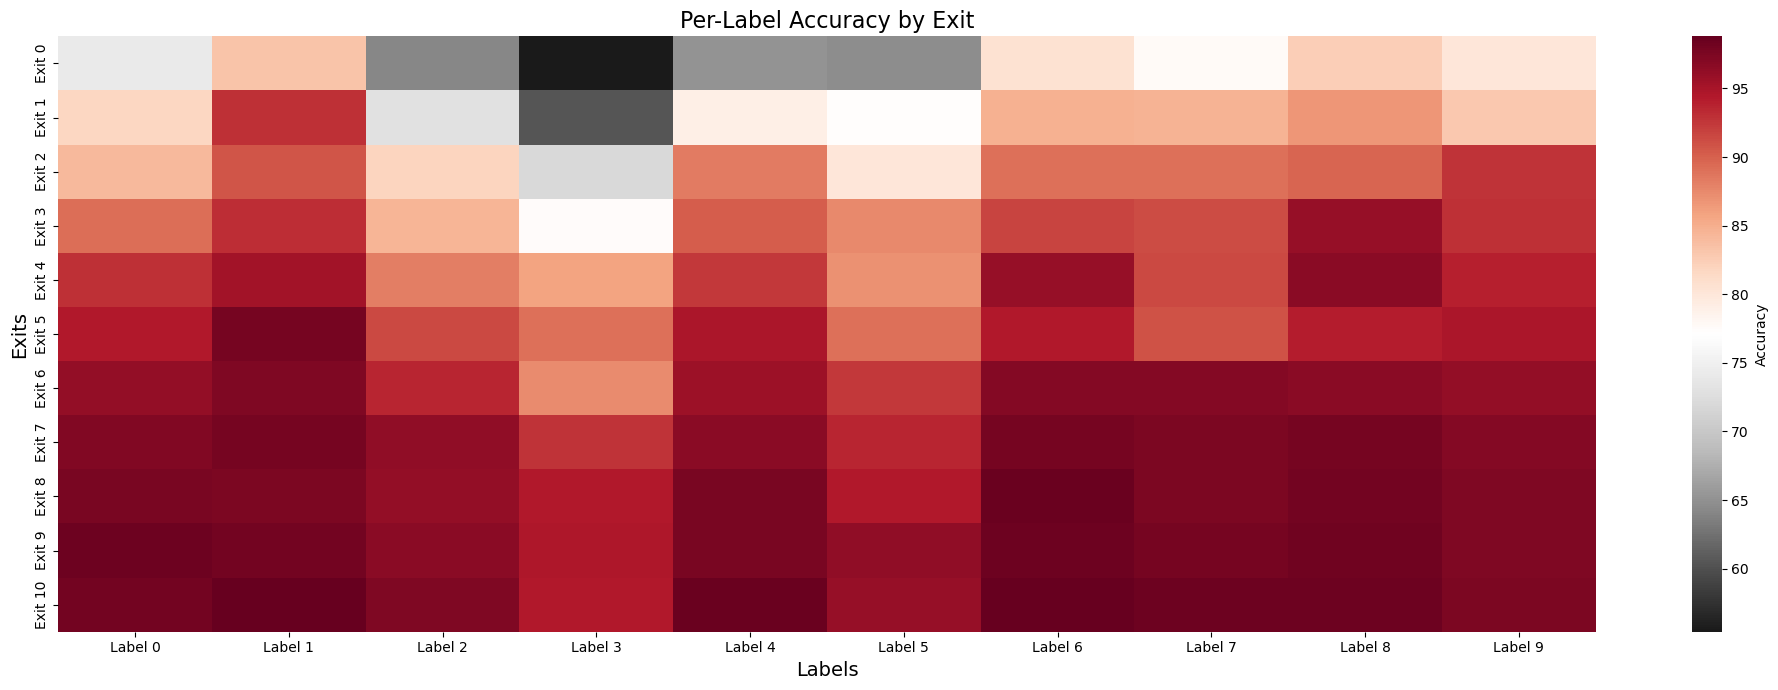

In [4]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title("Per-Label Accuracy by Exit", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

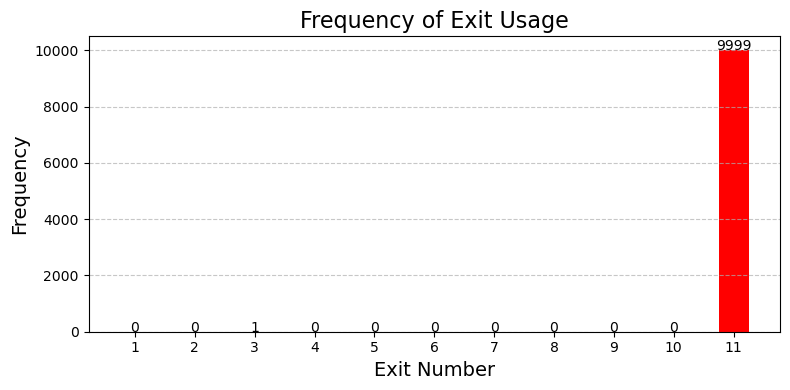

In [5]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title("Frequency of Exit Usage", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

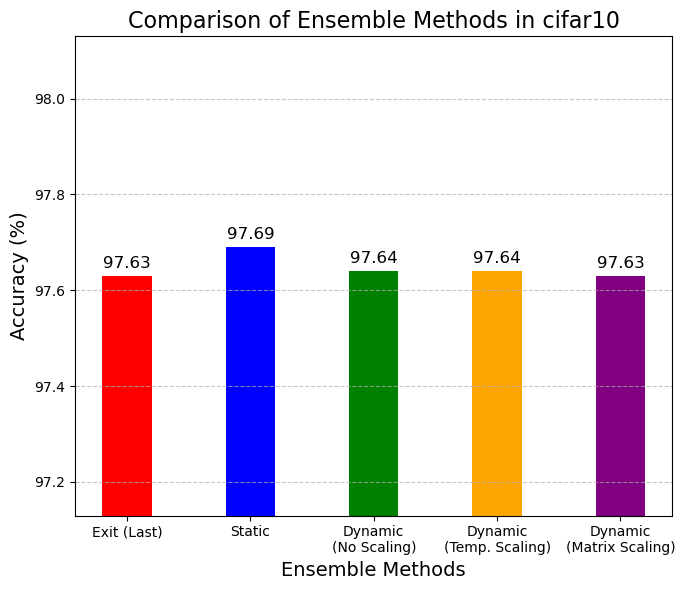

In [6]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Static",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [origin_acc[-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {data_choice}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## CIFAR-100

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
dataset_outdim = {'cifar10':10, 'cifar100':100,'imagenet':1000}
data_choice = 'cifar100'
cache_exp = torch.load(f'cache_exp_{data_choice}.pt')
cache_exp.keys()

dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

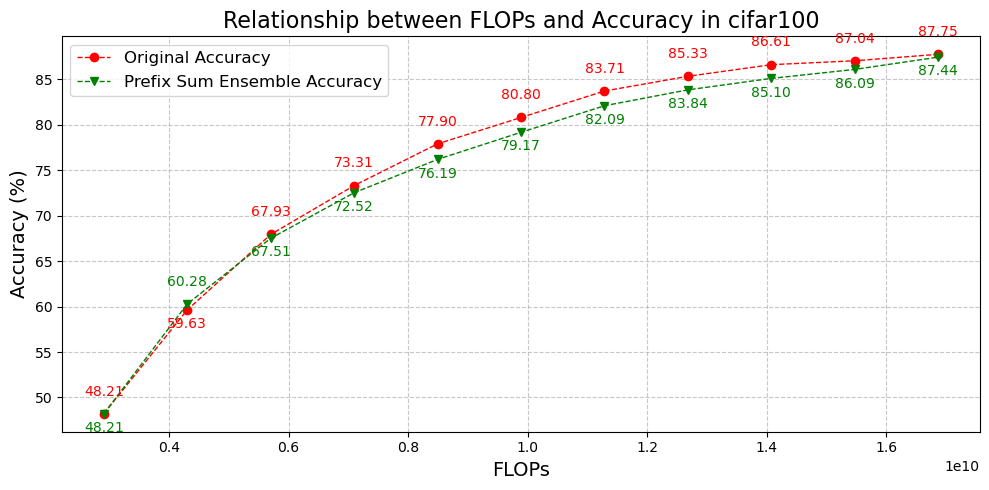

In [8]:
# Data: FLOPs and accuracy
flops_actual = [2908152576, 4304009472, 5699866368, 7095723264, 8491580160, 9887437056, 11283293952, 12679150848, 14075007744, 15470864640, 16866721536]
origin_acc = [48.21, 59.63, 67.93, 73.31, 77.9, 80.8, 83.71, 85.33, 86.61, 87.04, 87.75]
prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_actual, origin_acc, marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_actual, origin_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_actual, prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Prefix Sum Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_actual, prefix_sum_ensemble_acc)):
    tmp_offset = -1 if i == 1 else 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {data_choice}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

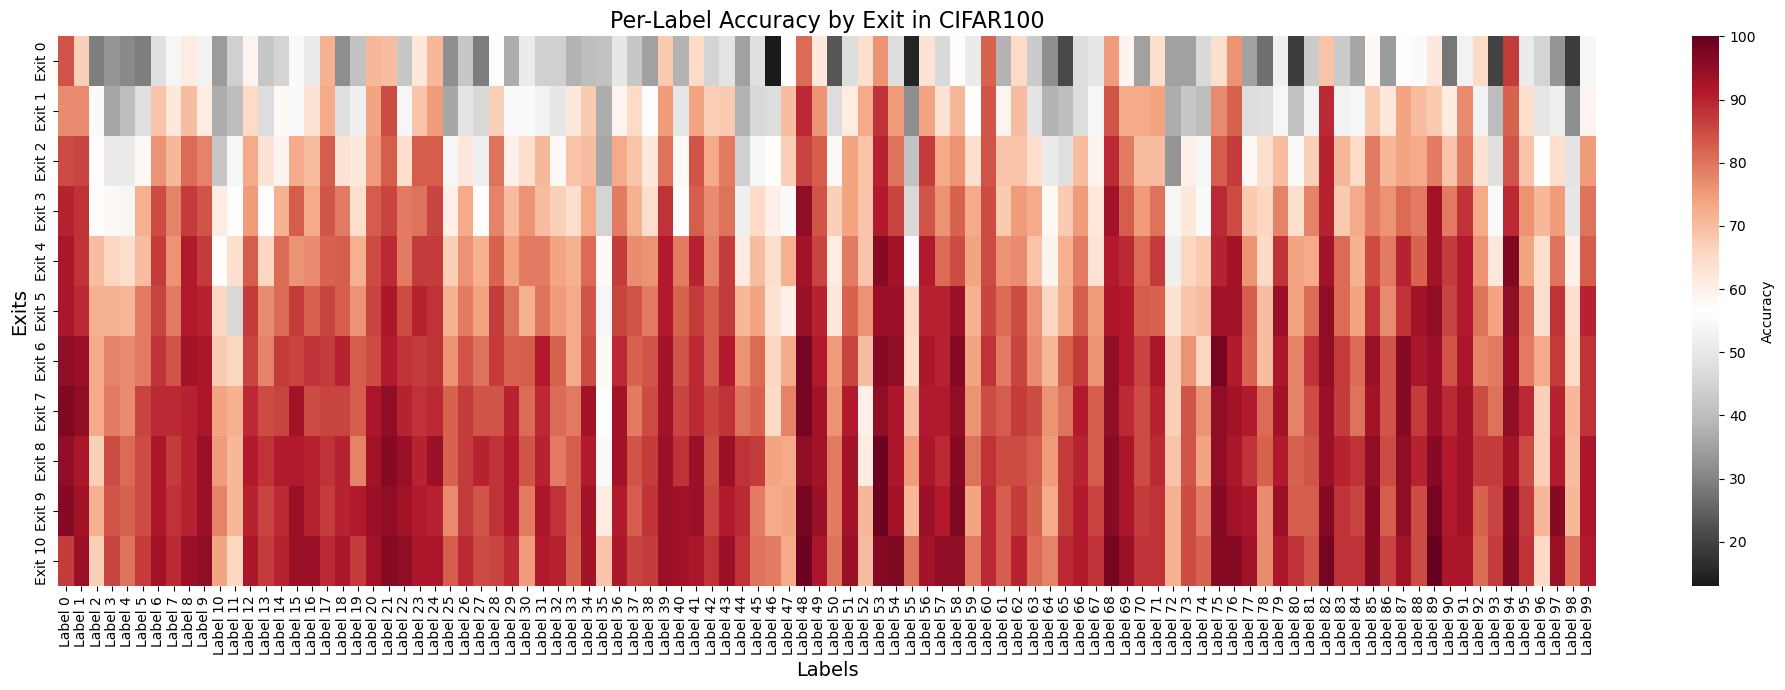

In [9]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title(f"Per-Label Accuracy by Exit in {data_choice.upper()}", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

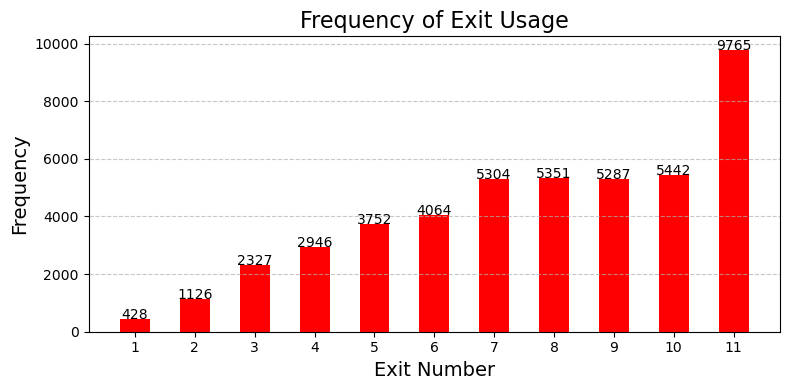

In [10]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title("Frequency of Exit Usage", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

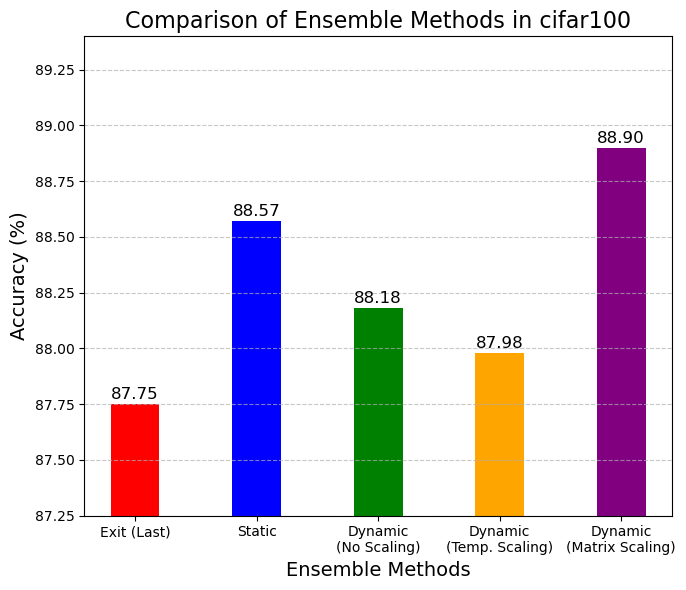

In [11]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Static",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [origin_acc[-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {data_choice}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## ImageNet-1K

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
dataset_outdim = {'cifar10':10, 'cifar100':100,'imagenet':1000}
data_choice = 'imagenet'
cache_exp = torch.load(f'cache_exp_{data_choice}.pt')
cache_exp.keys()

dict_keys(['prefix_sum_ensemble_acc', 'static_ensemble_acc', 'Dynamic_No_Scaling', 'choosen_exit_distribution', 'Dynamic_TS_Scaling', 'exits_precision', 'Dynamic_MS_Scaling'])

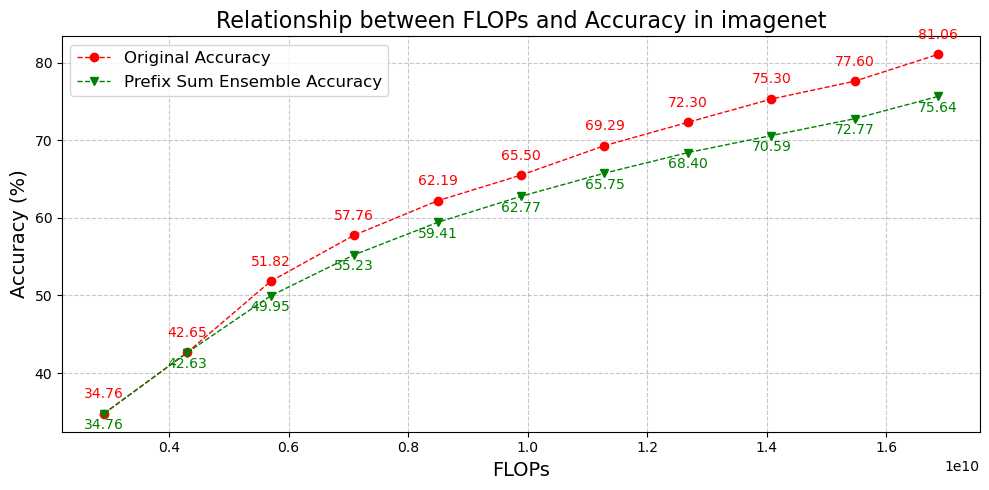

In [13]:
# Data: FLOPs and accuracy
flops_actual = [2908152576, 4304009472, 5699866368, 7095723264, 8491580160, 9887437056, 11283293952, 12679150848, 14075007744, 15470864640, 16866721536]
origin_acc = [34.76, 42.65, 51.82, 57.76, 62.19, 65.5, 69.29, 72.3, 75.3, 77.6, 81.06]
prefix_sum_ensemble_acc = cache_exp['prefix_sum_ensemble_acc']

# Plot FLOPs vs Accuracy
plt.figure(figsize=(10, 5))

# Plot origin accuracy
plt.plot(flops_actual, origin_acc, marker='o', markersize=6, linestyle='--', linewidth=1, color='red', label="Original Accuracy")
# Add data labels for origin accuracy
offset = 2  # Alternate label positions
text_label_size = 10
for i, (flop, acc) in enumerate(zip(flops_actual, origin_acc)):
    tmp_offset = 1
    plt.text(flop, acc + offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='red')

# Plot prefix sum ensemble accuracy
plt.plot(flops_actual, prefix_sum_ensemble_acc, marker='v', markersize=6, linestyle='--', linewidth=1, color='green', label="Prefix Sum Ensemble Accuracy")
# Add data labels for prefix sum ensemble accuracy
for i, (flop, acc) in enumerate(zip(flops_actual, prefix_sum_ensemble_acc)):
    tmp_offset = 1
    plt.text(flop, acc - offset * tmp_offset, f"{acc:.2f}", fontsize=text_label_size, ha='center', color='green')

# Titles and labels
plt.title(f"Relationship between FLOPs and Accuracy in {data_choice}", fontsize=16)
plt.xlabel("FLOPs", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

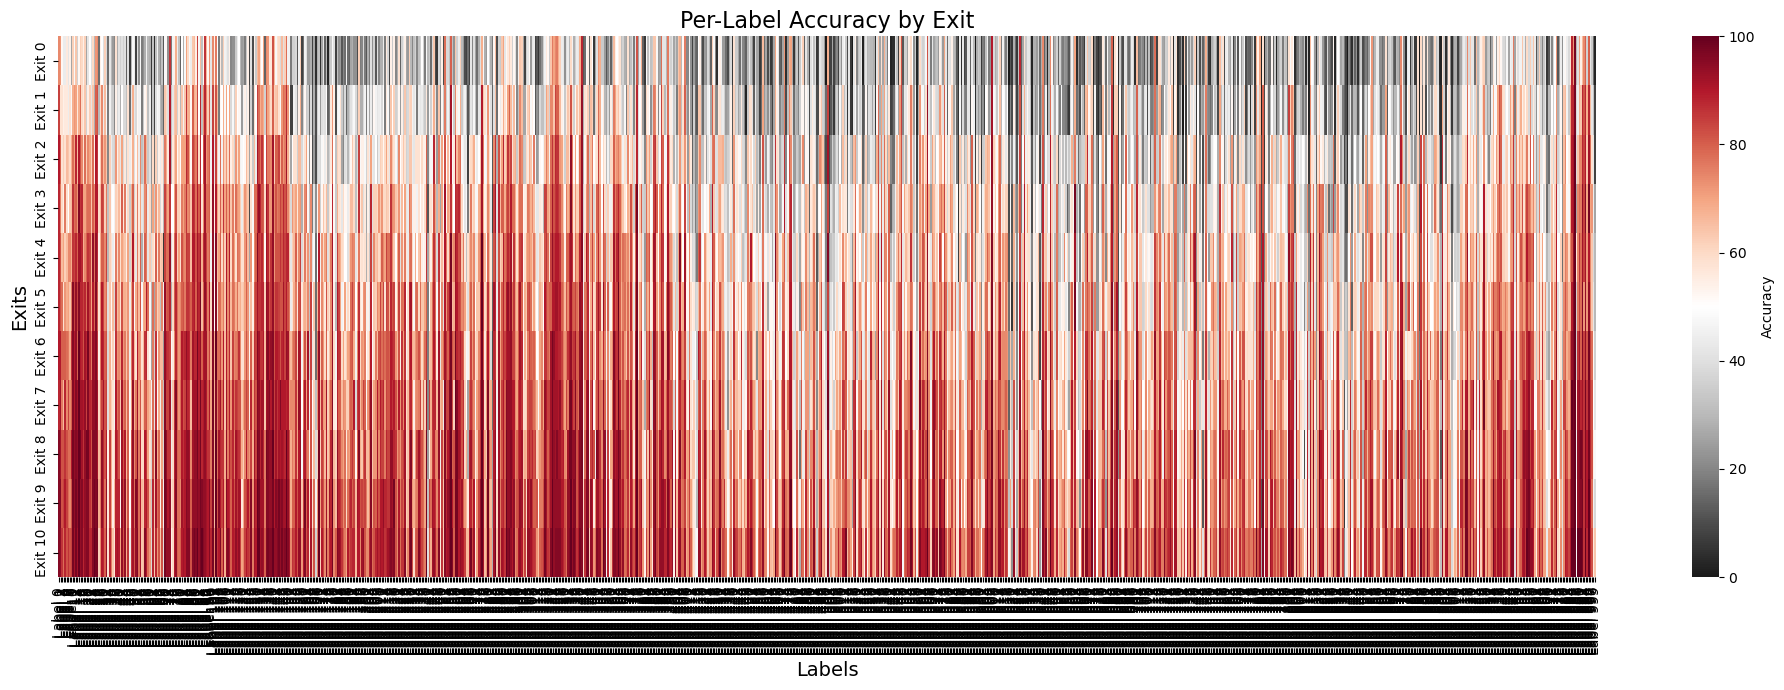

In [14]:
accuracy_matrix = cache_exp['exits_precision']
num_exits = 11
num_labels = dataset_outdim[data_choice]

# Heatmap 시각화
plt.figure(figsize=(20, 7))
sns.heatmap(
    accuracy_matrix,
    cmap="RdGy_r",      # 색상 스케일
    cbar_kws={'label': 'Accuracy'},  # 컬러바 레이블
    xticklabels=[f"Label {i}" for i in range(num_labels)],  # X축 라벨
    yticklabels=[f"Exit {i}" for i in range(num_exits)]     # Y축 라벨
)

# 그래프 제목과 축 레이블
plt.title("Per-Label Accuracy by Exit", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Exits", fontsize=14)
plt.tight_layout()

# 그래프 출력
plt.show()

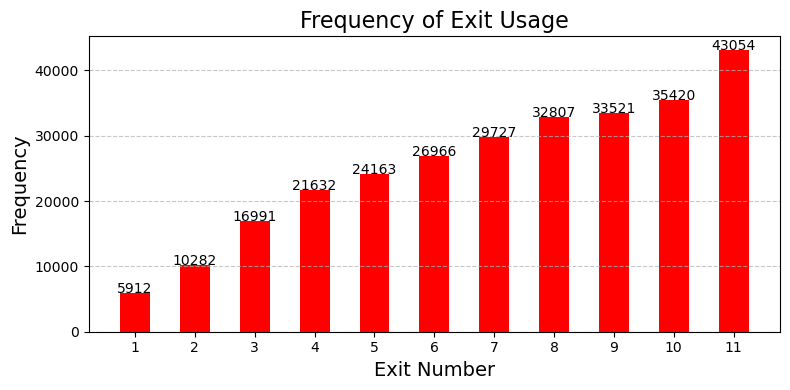

In [15]:
exits_data  = cache_exp['choosen_exit_distribution']

exit_ids = range(1,num_exits + 1)

# 각 출구가 선택된 횟수 계산
exit_counts = [0] * (len(exit_ids))
# for exits in exits_data:
#     exit_counts[len(exits) - 1] += 1
for exits in exits_data:
    for exit_id in exits:
        exit_counts[exit_id] += 1

# 막대 그래프 시각화
plt.figure(figsize=(8, 4))
plt.bar(exit_ids, exit_counts, color='red',  width= 0.5)

# 그래프 제목 및 축 레이블 설정
plt.title("Frequency of Exit Usage", fontsize=16)
plt.xlabel("Exit Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# X축 눈금 설정
plt.xticks(exit_ids)

# 값 레이블 추가
for i, count in zip(exit_ids, exit_counts):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

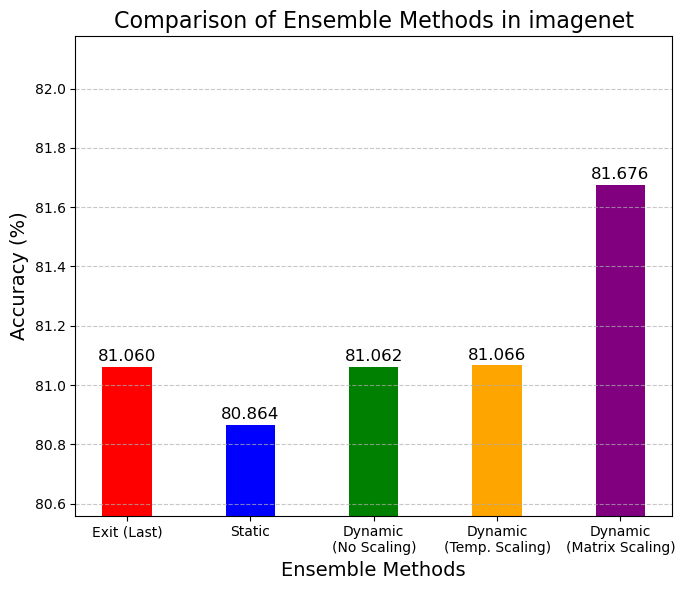

In [16]:
# Data: Ensemble methods and accuracies
methods = [
    'Exit (Last)',
    "Static",
    "Dynamic\n(No Scaling)",
    "Dynamic\n(Temp. Scaling)",
    "Dynamic\n(Matrix Scaling)"
]
accuracies = [origin_acc[-1], cache_exp['static_ensemble_acc'], cache_exp['Dynamic_No_Scaling'], cache_exp['Dynamic_TS_Scaling'], cache_exp['Dynamic_MS_Scaling']]
# Plot bar chart
plt.figure(figsize=(7, 6))
bars = plt.bar(methods, accuracies, width=0.4, color=["red", "blue", "green", "orange", "purple"], alpha=1,)

# Add data labels above bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.3f}", 
             ha='center', va='bottom', fontsize=12, color='black')

# Titles and labels
plt.title(f"Comparison of Ensemble Methods in {data_choice}", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Ensemble Methods", fontsize=14)
plt.ylim(accuracies[0]-0.5, accuracies[-1]+0.5)  # Adjust Y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()